## Imports:


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
# Importing src scripts:
sys.path.insert(0, 'src')
from misc_scripts import scripts
from data import data
from utils import utils
from models import models

## Loading datasets:

In [41]:
#Load CMU Corpus Dataset
metadata = data.load_metadata()
summaries_df = data.load_summaries()
cmu_df = metadata.merge(summaries_df, on="Wikipedia_movie_ID") 
#Load IMDB dataset

In [42]:
cmu_df

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countxries,Movie_genres,Movie_Summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama],"Eva, an upper class housewife, becomes frustra..."
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","[Family Film, Fantasy, Adventure, World cinema]","Every hundred years, the evil Morgana returns..."
4,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Romantic comedy, Ensemble Film, Comedy-drama,...","Adam, a San Francisco-based artist who works a..."
...,...,...,...,...,...,...,...,...,...,...
42202,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Crime Fiction, Thriller, Comedy, Supernatural]",{{plot}} The film opens with a Great Western e...
42203,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",[Drama],Two former National Oceanic Atmospheric Admini...
42204,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","[Biographical film, Drama, Documentary]",{{No plot}} This film follows 12 years in the ...
42205,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","[Science Fiction, Japanese Movies, Adventure, ...","The story takes place in the year 2092,The Sup..."


In [43]:
characters = pd.read_table(f"data/MovieSummaries/character.metadata.tsv", header=None)

characters.columns = [
"Wikipedia_movie_ID",
"Freebase movie ID",
"Movie release date",
"Character name",
"Actor date of birth",
"Actor gender",
"Actor height (in meters)",
"Actor ethnicity (Freebase ID)",
"Actor name",
"Actor age at movie release",
"Freebase character/actor map ID",
"Freebase character ID",
"Freebase actor ID"
]

# Merging character database with summaries
characters =  characters[["Wikipedia_movie_ID", "Actor gender", "Character name"]]
characters = characters.groupby("Wikipedia_movie_ID").agg({
    "Actor gender": list, 
    "Character name": list,
}).reset_index()

char_sum_CMU = pd.merge(cmu_df, characters, on="Wikipedia_movie_ID", how="inner")
# keeping only relevant columns
char_sum_CMU = char_sum_CMU[["Wikipedia_movie_ID", "Actor gender", "Character name","Movie_Summary"]]
char_sum_CMU

,Wikipedia_movie_ID,Actor gender,Character name,Movie_Summary
0,975900,"[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[Akooshay, Lieutenant Melanie Ballard, Desolat...","Set in the second half of the 22nd century, th..."
1,9363483,"[M, F]","[nan, nan]",A series of murders of rich young women throug...
2,261236,"[F, M, M]","[nan, nan, nan]","Eva, an upper class housewife, becomes frustra..."
3,18998739,"[nan, F, M, M, M, nan, nan, M]","[nan, Morgana, nan, nan, nan, nan, nan, nan]","Every hundred years, the evil Morgana returns..."
4,6631279,"[M, F, F, M, F, F]","[nan, Rebecca, Nina, nan, nan, nan]","Adam, a San Francisco-based artist who works a..."
...,...,...,...,...
37776,15394941,"[M, M, M, F, F, F, M, F, M, M, M, M, M, M]","[Rajeshwar Choudhary, Gopinath, Kishan R. Chou...",Kishan killed a man in his childhood when the...
37777,26482675,[M],[nan],"The film is about two friends, Tayyar , a mafi..."
37778,23851782,"[F, M, F, M, M, nan, F, M, nan, F, M, M, M]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",{{plot}} The film opens with a Great Western e...
37779,913762,"[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]","[Mesena, Hibiki, Ishtar, Sylvie, Exegran, Addi...","The story takes place in the year 2092,The Sup..."


In [44]:
# Function to calculate female percentage
def calculate_female_percentage(genders):
    valid_genders = [g for g in genders if pd.notna(g)]
    if len(valid_genders) == 0:
        return -1
    female_count = sum(1 for g in valid_genders if g == 'F')
    return (female_count / len(valid_genders)) * 100

# Create the new column with the female percentage
char_sum_CMU['Female Percentage'] = char_sum_CMU['Actor gender'].apply(calculate_female_percentage)
char_sum_CMU = char_sum_CMU[char_sum_CMU['Female Percentage'] != -1]

In [45]:
char_sum_CMU

,Wikipedia_movie_ID,Actor gender,Character name,Movie_Summary,Female Percentage
0,975900,"[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[Akooshay, Lieutenant Melanie Ballard, Desolat...","Set in the second half of the 22nd century, th...",35.294118
1,9363483,"[M, F]","[nan, nan]",A series of murders of rich young women throug...,50.000000
2,261236,"[F, M, M]","[nan, nan, nan]","Eva, an upper class housewife, becomes frustra...",33.333333
3,18998739,"[nan, F, M, M, M, nan, nan, M]","[nan, Morgana, nan, nan, nan, nan, nan, nan]","Every hundred years, the evil Morgana returns...",20.000000
4,6631279,"[M, F, F, M, F, F]","[nan, Rebecca, Nina, nan, nan, nan]","Adam, a San Francisco-based artist who works a...",66.666667
...,...,...,...,...,...
37776,15394941,"[M, M, M, F, F, F, M, F, M, M, M, M, M, M]","[Rajeshwar Choudhary, Gopinath, Kishan R. Chou...",Kishan killed a man in his childhood when the...,28.571429
37777,26482675,[M],[nan],"The film is about two friends, Tayyar , a mafi...",0.000000
37778,23851782,"[F, M, F, M, M, nan, F, M, nan, F, M, M, M]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",{{plot}} The film opens with a Great Western e...,36.363636
37779,913762,"[M, M, F, F, M, M, M, M, F, M, M, F, M, F, M]","[Mesena, Hibiki, Ishtar, Sylvie, Exegran, Addi...","The story takes place in the year 2092,The Sup...",33.333333


In [46]:
female_movies = char_sum_CMU[char_sum_CMU["Female Percentage"] >= 66].copy()
male_movies = char_sum_CMU[char_sum_CMU["Female Percentage"] <= 33].copy()
print('Number of movies with high female ratio: ', len(female_movies))
print('Number of movies with high male ratio: ', len(male_movies))

Number of movies with high female ratio:  3429
Number of movies with high male ratio:  17466


# Plotting distribution of female percentage:

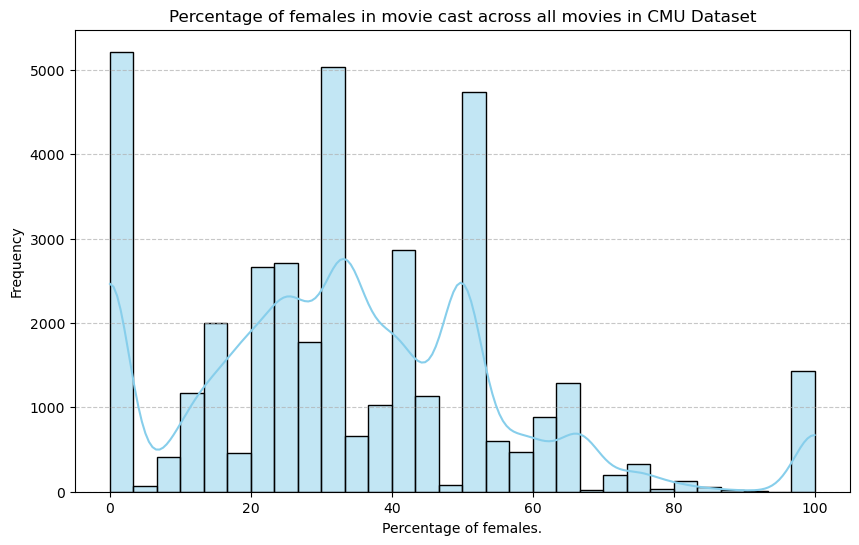

In [48]:
import seaborn as sns

# Plotting the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(char_sum_CMU["Female Percentage"], bins=30, kde=True, color='skyblue')
plt.xlabel('Percentage of females.')
plt.ylabel('Frequency')
plt.title('Percentage of females in movie cast across all movies in CMU Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Finding character keywords in the summaries:

In [21]:
import spacy
from collections import Counter
import re
from wordcloud import WordCloud
import multiprocessing as mp

# # Function to apply extract_adj_verbs in parallel using multiprocessing
def parallel_apply_multiprocessing(series, func, n_cores=4):
    with mp.Pool(n_cores) as pool:
        result = pool.map(func, series)
    return result

# Load the spaCy language model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Model 'en_core_web_sm' not found. Downloading...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Functions to extract adjectives and verbs from a text
def extract_adj(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in ('ADJ')]

def extract_verb(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in ('VERB')]

# Extract adjectives and verbs from each movie summary for the female df
female_movies['Adj_Tokens'] = parallel_apply_multiprocessing(female_movies['Movie_Summary'],extract_adj,n_cores=mp.cpu_count())
female_movies['Verb_Tokens'] = parallel_apply_multiprocessing(female_movies['Movie_Summary'],extract_verb,n_cores=mp.cpu_count())


In [22]:
# Extract adjectives and verbs from each movie summary for the male df
male_movies['Adj_Tokens'] = parallel_apply_multiprocessing(male_movies['Movie_Summary'],extract_adj,n_cores=mp.cpu_count())
male_movies['Verb_Tokens'] = parallel_apply_multiprocessing(male_movies['Movie_Summary'],extract_verb,n_cores=mp.cpu_count())

In [6]:
import pickle
female_movies.to_pickle("female_movies.pkl")
male_movies.to_pickle("male_movies.pkl")

In [4]:
import pickle
import spacy
from collections import Counter
import re
from wordcloud import WordCloud
import multiprocessing as mp
female_movies = pd.read_pickle("female_movies.pkl")
male_movies = pd.read_pickle("male_movies.pkl")

In [5]:
female_movies
male_movies

,Wikipedia_movie_ID,Actor gender,Character name,Movie_Summary,Female Percentage,Adj_Tokens,Verb_Tokens
3,18998739,"[nan, F, M, M, M, nan, nan, M]","[nan, Morgana, nan, nan, nan, nan, nan, nan]","Every hundred years, the evil Morgana returns...",20.000000,"[evil, last, new, elderly, natural, old, same,...","[return, claim, intend, destroy, fail, intend,..."
5,171005,"[M, M, M, M, F, M, M, M, M, M, F, M, M, F, M, ...","[Henry V, nan, nan, nan, Catherine of Valois, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,15.000000,"[brief, romantic, french, english, royal, greek]","[make, name, have, negotiate, inform, last, li..."
9,32456683,[M],[nan],"Otto Brosowski, a communist miner, writes to t...",0.000000,"[communist, soviet, harsh, capitalist, hard, g...","[write, tell, work, demand, receive, seize, hi..."
11,20604092,[M],[nan],The film opens with a simpleton from a small v...,0.000000,"[small, big, good, famous, successful, many, i...","[open, want, become, play, go, meet, help, pra..."
14,9633533,"[F, M, M, F, M, M, M, M, M]","[nan, Unnikrishnan, nan, nan, nan, nan, Advert...","Professor Kurian Fernandez , a convict escapes...",22.222222,"[several, only, opposite, interested, full, fl...","[fail, chase, nab, draw, capture, feel, land, ..."
...,...,...,...,...,...,...,...
37768,21975745,[M],[nan],The story begins with young Bobby and his frie...,0.000000,"[young, strict, mean, beagle, lost, unconsciou...","[begin, have, refuse, return, hear, realize, l..."
37771,26044505,"[nan, M, M, M]","[nan, nan, nan, nan]",Insane archaeologist Professor Andrew Forbes ...,0.000000,[aztec],"[use, unearth, kill, know, try, stop]"
37773,1918494,"[nan, M, M, M, M, F, M, F, M, nan, M, F, M, M,...","[Maude, Doc Wilson, Bunky, Spud, Doug Mackenzi...",Havoc is wrought on the inhabitants of a small...,18.181818,"[small, troubled, teenage, small, genuine, onl...","[work, lead, get, banish, relocate, finish, sh..."
37776,15394941,"[M, M, M, F, F, F, M, F, M, M, M, M, M, M]","[Rajeshwar Choudhary, Gopinath, Kishan R. Chou...",Kishan killed a man in his childhood when the...,28.571429,"[alive, precious, powerful, vulnerable, coward...","[kill, abuse, go, remand, come, harden, meet, ..."


In [13]:
from itertools import chain
# Flatten the list of all adjectives and verbs
fem_adj_flat = np.array(list(chain.from_iterable(female_movies["Adj_Tokens"])))
fem_verb_flat = np.array(list(chain.from_iterable(female_movies["Verb_Tokens"])))
male_adj_flat = np.array(list(chain.from_iterable(male_movies["Adj_Tokens"])))
male_verb_flat = np.array(list(chain.from_iterable(male_movies["Verb_Tokens"])))
fem_adj_flat

array(['hard', 'next', 'reluctant', ..., 'huge', 'much', 'bad'],
      dtype='<U106')

In [22]:
# Count word frequencies using Counter
fem_adj_counts = Counter(fem_adj_flat)
fem_verb_counts = Counter(fem_verb_flat)
male_verb_counts = Counter(male_verb_flat)
male_adj_counts = Counter(male_adj_flat)

In [36]:
# Function to normalize counts and filter words with similar relative frequencies (within 10%)
def filter_similar_counts(counter1, counter2, threshold=0.4):
    # Calculate total counts for each Counter to normalize
    total_count1 = sum(counter1.values())
    total_count2 = sum(counter2.values())

    # Calculate relative frequencies
    relative_freqs1 = {word: count / total_count1 for word, count in counter1.items()}
    relative_freqs2 = {word: count / total_count2 for word, count in counter2.items()}

    # Initialize filtered counters
    filtered_counter1 = Counter()
    filtered_counter2 = Counter()

    # Get the intersection of words from both counters
    common_keys = set(relative_freqs1.keys()).intersection(set(relative_freqs2.keys()))

    for word in common_keys:
        freq1 = relative_freqs1[word]
        freq2 = relative_freqs2[word]

        # Calculate the percentage difference between relative frequencies
        if abs(freq1 - freq2) / max(freq1, freq2) > threshold:
            # If the difference is greater than threshold, keep the word
            filtered_counter1[word] = counter1[word]
            filtered_counter2[word] = counter2[word]

    # Add words that are unique to each counter
    unique_keys1 = set(counter1.keys()).difference(set(counter2.keys()))
    unique_keys2 = set(counter2.keys()).difference(set(counter1.keys()))

    for word in unique_keys1:
        filtered_counter1[word] = counter1[word]

    for word in unique_keys2:
        filtered_counter2[word] = counter2[word]

    return filtered_counter1, filtered_counter2

fem_adj_counts, male_adj_counts = filter_similar_counts(fem_adj_counts, male_adj_counts)
fem_verb_counts, male_verb_counts = filter_similar_counts(fem_verb_counts, male_verb_counts)

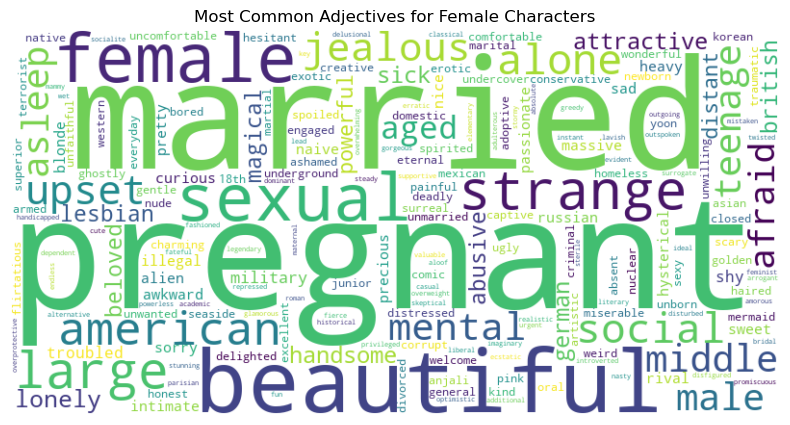

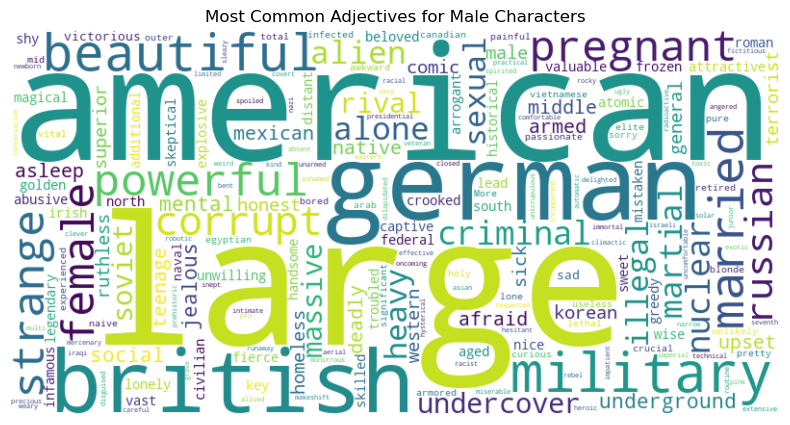

In [37]:


# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fem_adj_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Adjectives for Female Characters')

plt.show()

# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(male_adj_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Adjectives for Male Characters')
plt.show()

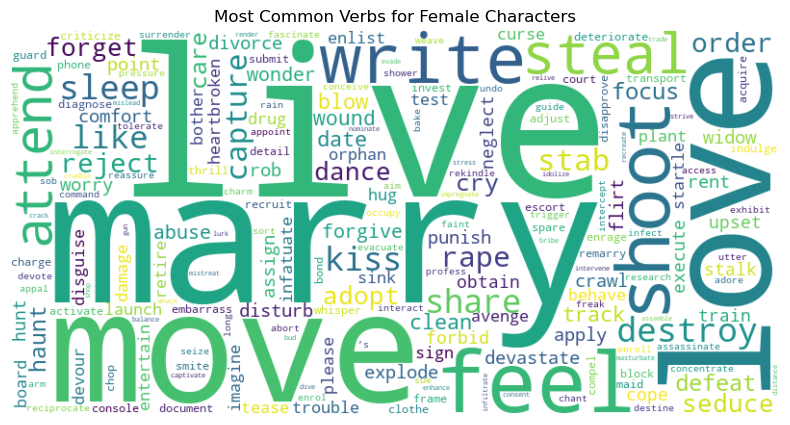

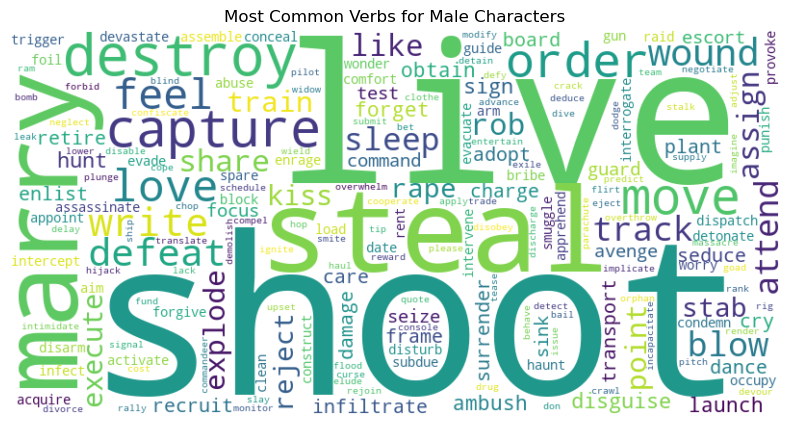

In [38]:

# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fem_verb_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Verbs for Female Characters')
plt.show()

# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(male_verb_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Verbs for Male Characters')
plt.show()

Processing movie number: 1
0
1
2
3
4
5
Processing movie number: 2


KeyboardInterrupt: 